In [4]:
# Basic imports
import pandas as pd
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [7]:
# Load dataset
try:
  df = pd.read_csv("/content/email_spam.csv", encoding='utf-8')
except UnicodeDecodeError:
  df = pd.read_csv("/content/email_spam.csv", encoding='latin-1')

# Select only the first two columns and rename them
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Preview
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Shape of dataset
df.shape


(5572, 2)

In [9]:
# Count of spam vs ham
df['label'].value_counts()


,count
label,
ham,4825
spam,747


In [10]:
# Check null values
df.isnull().sum()


,0
label,0
message,0


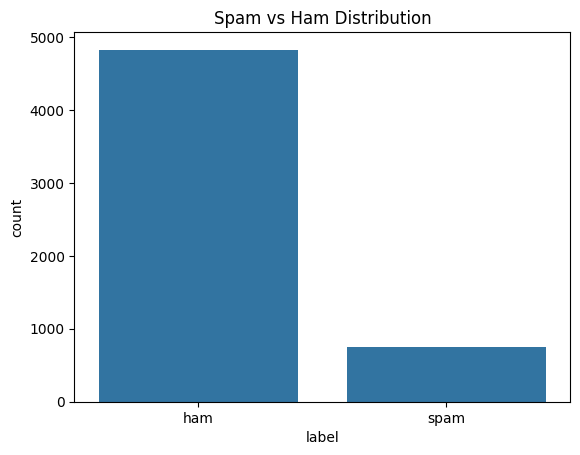

In [11]:
# Distribution plot
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()


In [12]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return " ".join(words)

df['clean_message'] = df['message'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [13]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_message'])

# Target encoding: ham=0, spam=1
y = df['label'].map({'ham':0, 'spam':1})


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (4457, 9376)
Test Shape: (1115, 9376)


In [15]:
# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Naive Bayes Accuracy: 0.9659192825112107


In [16]:
# Train Linear SVM
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115

SVM Accuracy: 0.9757847533632287


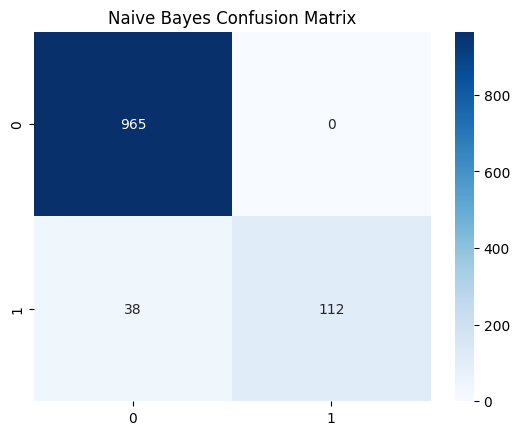

In [17]:
# Confusion matrix - Naive Bayes
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


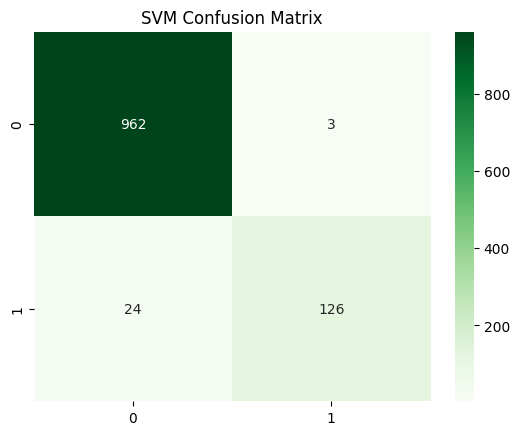

In [18]:
# Confusion matrix - SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.show()


In [19]:
sample_emails = [
    "Congratulations! You've won a free ticket. Call now!",
    "Hey, are we still meeting tomorrow for lunch?"
]

predictions = svm.predict(tfidf.transform(sample_emails))
for email, label in zip(sample_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if label==1 else 'Ham'}\n")


Email: Congratulations! You've won a free ticket. Call now!
Prediction: Ham

Email: Hey, are we still meeting tomorrow for lunch?
Prediction: Ham

